# Taller Regresión y clasificación - Parte 2
## Predicción de precios de viviendas en Bostón
### Autor: Samuel Mesa
### Fecha: 20 de abril de 2021

### Objetivo: Construya una red neuronal de regresión para predecir el precio de las viviendas. Use los datos Boston Housing. Los datos los puede encontrar en el enlace de Kaggle.


 Importar las librerías para la lectura de datos, gráficas y para definir el modelo de los datos

In [1]:
# Importamos la librería SKLearn, que trae bastantes funcionalidades de Machine
# Learning. Esta librería también incluye algunos datasets muy conocidos como por
# ejemplo el que vamos a utilizar hoy: El Boston Housing Dataset.
from sklearn.datasets import load_boston
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, KFold

import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

## Boston house prices dataset

**Total datos**: 506

**Descripción de los atributos**:

- **CRIM**: tasa de criminalidad per cápita.
- **ZN**: proporción de terreno residencial dividido en zonas para lotes de más de 25,000 pies cuadrados.
- **INDUS**: pproporción de negocios no minoristas.
- **CHAS**: Variable ficticia del río (= 1 si el tramo limita con el río; 0 en caso contrario).
- **NOX**: concentración de óxidos nítricos (10 ppm).
- **RM**: número medio de habitaciones por vivienda.
- **AGE**: proporción de viviendas ocupadas por sus propietarios construidas antes de 1940.
- **DIS**: distancias ponderadas a los centros de empleo de Boston
- **RAD**: índice de accesibilidad a carreteras radiales.
- **TAX**: tasa del impuesto sobre el valor total de la propiedad por cada $10,000.
- **PTRATIO**: número de alumnos por docente y ciudad.
- **B**: 1000(Bk - 0.63)^2 donde B es la proporción de inmigrantes.
- **LSTAT**: % de menor estatus de la población.
- **MEDV**: Valor medio de las viviendas ocupadas por sus propietarios en $1 000.    

In [2]:
#X = df.loc[:, df.columns != 'MEDV']
#y = df.loc[:, df.columns == 'MEDV']

boston_dataset = load_boston()
df_X = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df_y = pd.Series(boston_dataset.target)

## Análisis exploratorio de los datos

In [3]:
print(df_X.head())


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [19]:
#plt.figure(figsize=(20, 20))
#plot_scatter = pd.plotting.scatter_matrix(df_X, c=df_y, figsize=(20, 20), marker='.',
#    grid=False, diagonal="kde", hist_kwds={'bins': 20}, s=50, alpha=.8)
#plt.savefig('img/correlaccion_boston.png')
#plt.tight_layout()

![Image](https://i.imgur.com/wJtBiiL.png)

In [20]:
#plt.figure(figsize=(15, 15))
#cm = np.corrcoef(df_X.values.T)
#sns.set(font_scale=1.2)
#hm = sns.heatmap(data=cm, cmap='RdBu', cbar=True, annot=True, square=True, fmt='.2f',
#                 annot_kws={'size': 12}, yticklabels=df_X.columns.to_list(), 
#                 xticklabels=df_X.columns.to_list())
#plt.savefig('img/matriz_boston.png')

![Image](https://i.imgur.com/4c3PS1c.png)

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>],
       [<AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>],
       [<AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>],
       [<AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>]],
      dtype=object)

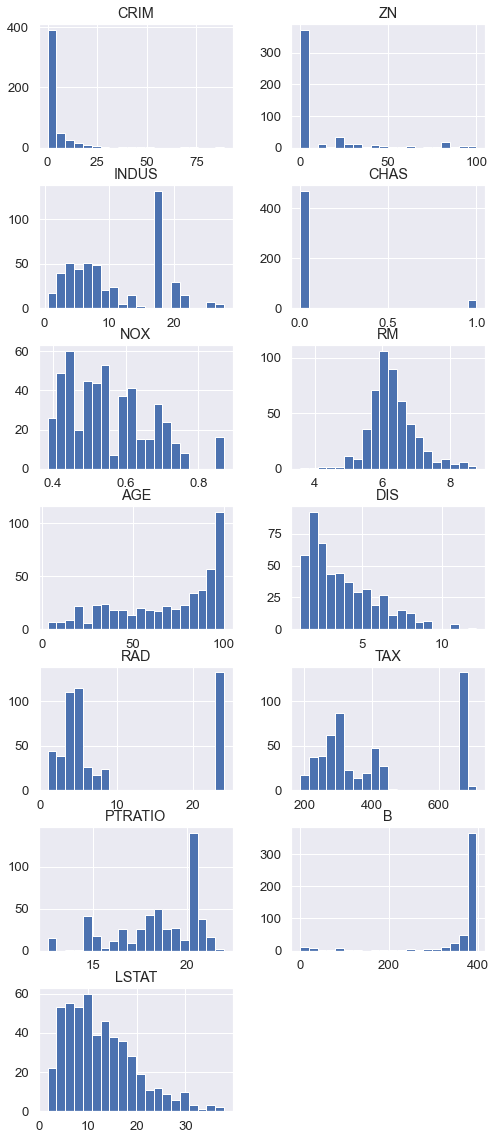

In [24]:
df_X.hist(bins=20, figsize=(8, 20), layout=(7, 2))


<AxesSubplot:>

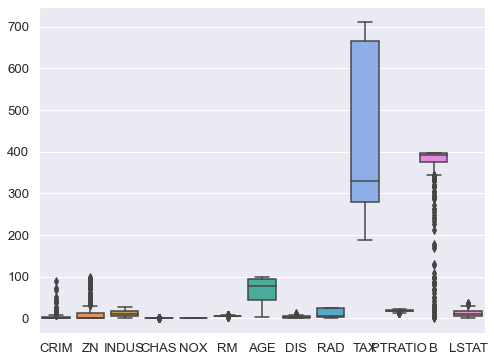

In [25]:
fig = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df_X)

In [7]:
print(df_X.isnull().sum())

sts_dfX = df_X.describe().transpose()
sts_dfY = df_y.describe()
print(sts_dfX)
print(sts_dfY)

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64
         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000

In [8]:
df_describe = df_X.describe().transpose()
print(df_describe)
correlation_data = df_X.corr()
correlation_data.style.background_gradient(cmap='coolwarm', axis=None)  


         count        mean         std        min         25%        50%  \
CRIM     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
ZN       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
INDUS    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
CHAS     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
NOX      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
RM       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
AGE      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
DIS      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
RAD      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
TAX      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
PTRATIO  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
B        506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
LSTAT    506

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


 ## Entrenamiento

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=123)
print('No. de fila de datos entrenamiento: ', X_train.shape[0])
print('No. de filas de datos de evaluación: ', X_test.shape[0])
print('No. de columnas del entrenamiento: ', X_train.shape[1])

print('No. de filas de salida del entrenamiento: ', y_train.shape[0])
print('No. de filas de salida de la evaluación: ', y_test.shape[0])

No. de fila de datos entrenamiento:  404
No. de filas de datos de evaluación:  102
No. de columnas del entrenamiento:  13
No. de filas de salida del entrenamiento:  404
No. de filas de salida de la evaluación:  102


## Normaliza los datos

Como muestra la distribución de los datos es necesario realizar una normalización de los datos 

<AxesSubplot:>

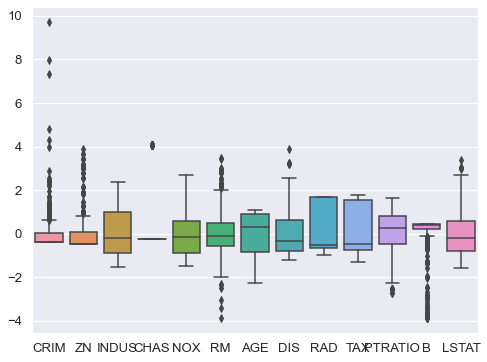

In [26]:
#sc = StandardScaler()
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

mean = X_train.mean(axis=0)
std = X_train.std(axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

fig = plt.subplots(figsize=(8, 6))
sns.boxplot(data=X_train)


### Modelo de red neuronal
No se utiliza ninguna función de activación para la capa de salida porque es 
una regresión y estamos interesados en predecir valores numéricos directamente sin transformación
Se utiliza el algoritmo de optimización de ADAM y una función de pérdida de error media al cuadrado optimizada.
Esta será la misma métrica que usaremos para evaluar el desempeño del modelo.

In [12]:
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(13, ), activation='relu', name='dense_1'))
model.add(layers.Dense(64, activation='relu', name='dense_2'))
model.add(layers.Dense(1, activation='linear', name='dense_output'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()
model.save('hd5/boston.h5')


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1792      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_output (Dense)         (None, 1)                 65        
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


![Image](https://i.imgur.com/RDfq4v3.png)

 ### Entrenamiento

In [13]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05)


Epoch 1/100
12/12 [==============================] - 4s 131ms/step - loss: 558.1362 - mae: 22.0254 - val_loss: 595.9408 - val_mae: 22.2249
Epoch 2/100
12/12 [==============================] - 0s 38ms/step - loss: 466.6636 - mae: 19.8257 - val_loss: 514.1331 - val_mae: 20.4968
Epoch 3/100
12/12 [==============================] - 1s 47ms/step - loss: 417.9145 - mae: 18.4598 - val_loss: 398.0696 - val_mae: 17.8001
Epoch 4/100
12/12 [==============================] - 1s 52ms/step - loss: 316.4651 - mae: 15.5357 - val_loss: 257.2911 - val_mae: 13.8693
Epoch 5/100
12/12 [==============================] - 1s 51ms/step - loss: 164.3954 - mae: 10.7668 - val_loss: 134.1405 - val_mae: 9.4462
Epoch 6/100
12/12 [==============================] - 0s 41ms/step - loss: 95.3284 - mae: 7.6998 - val_loss: 67.2605 - val_mae: 6.3272
Epoch 7/100
12/12 [==============================] - 1s 41ms/step - loss: 53.5601 - mae: 5.7304 - val_loss: 41.1189 - val_mae: 5.0922
Epoch 8/100
12/12 [=======================

 ### Evaluación ANN

Se realiza la evaluación de la red a partir de la función de pérdida y la predicción

In [14]:
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics, 'bo--')
    plt.plot(epochs, val_metrics, 'ro-')
    plt.title('Entrenamiento y validación '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
    

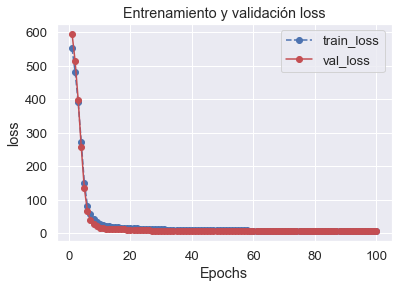

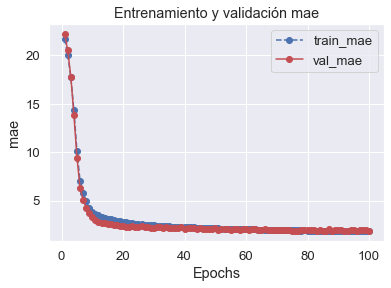

In [15]:

plot_metric(history, 'loss')
plot_metric(history, 'mae')


 ### Predicciones

In [18]:

train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

r2_score_train = r2_score(y_train, train_predictions)
r2_score_test = r2_score(y_test, test_predictions)

mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

# Predicting RMSE the Test set results
rmse = mean_squared_error(y_true=y_test, y_pred=test_predictions, squared=False)
#print("CV: ", cv_linear.mean())
print('R2_score (train): ', r2_score_train)
print('R2_score (test): ', r2_score_test)
print("RMSE: ", rmse)


4/4 [==============================] - 0s 22ms/step - loss: 22.0349 - mae: 2.6546
Mean squared error on test data:  22.034881591796875
Mean absolute error on test data:  2.6546127796173096
R2_score (train):  0.9262004041667897
R2_score (test):  0.7336716012786972
RMSE:  4.6941326433782535


 ### Verificar la importancia de las variables

 Esta libreria permite poner por orden de importancia de cada una de las variables, entre las primeras el acceso a vías y el número de habitaciones promedio

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module 'gast' has no attribute 'Index'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


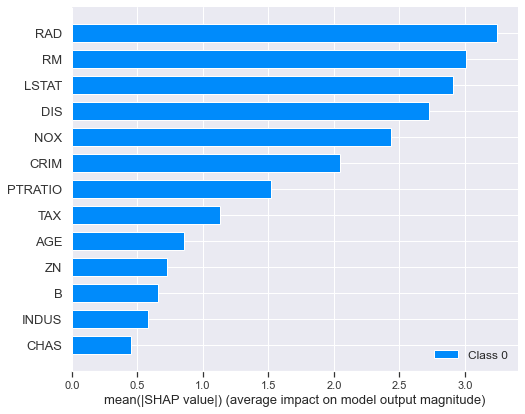

In [17]:
import shap
shap.initjs()

explainer = shap.DeepExplainer(model, X_train[:100].values)
shap_values = explainer.shap_values(X_test[:100].values)

shap.summary_plot(shap_values, X_test, plot_type='bar')


## Conclusiones

* Para el desarrollo del modelo es necesario descartar algunas de las variables que no influyen en la variable dependiente
* Para el desarrollo fue necesario correr varios modelo de red neuronal hasta  conseguir un modelo con una respiesta correcta
* El RMSE que entregó el modelo fue de 4.69 * 1000 = 5690 dolares de diferencia con respecto a las predicciones